<a href="https://colab.research.google.com/github/FedericoMz/DM2-FMAProject/blob/main/DM2_Modulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
import os

py_file_location = "/content/drive/MyDrive/Colab Notebooks/"
sys.path.append(os.path.abspath(py_file_location))

# Nuova sezione

In [ ]:
!pip install git+https://github.com/dainean/eif.git

  Cloning https://github.com/dainean/eif.git to /tmp/pip-req-build-0gn2pd7p
  Running command git clone -q https://github.com/dainean/eif.git /tmp/pip-req-build-0gn2pd7p
  Created wheel for eif: filename=eif-2.0.2-cp37-cp37m-linux_x86_64.whl size=250903 sha256=1c31e3d7b546fc2dc5ba7d9948d39fffd60cdbc6a76fb3e01d201a3a5e80d873
  Stored in directory: /tmp/pip-ephem-wheel-cache-_5fmp0jl/wheels/aa/07/c4/8fae0e1ca4ceda5690c1c5b7c0c2ee86c7f8d8d626647394fc
Successfully built eif


In [ ]:
!pip install python-dotenv

In [ ]:
!pip install jgraph


     |████████████████████████████████| 122kB 21.4MB/s 


In [ ]:
%matplotlib inline


import os
import IPython.display as ipd
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import eif as iso
#


from pandas.api.types import CategoricalDtype
import utils

plt.rcParams['figure.figsize'] = (17, 5)

# Some matplotlib options
%matplotlib inline
matplotlib.style.use("ggplot")

# General pandas options
#pd.set_option('display.max_colwidth', -1)  # Show the entire column 
#pd.options.display.max_columns = 1000 
#pd.options.display.max_rows = 100000

# Seaborn options
sns.set_style("whitegrid")

#the absolute state of madness
    #pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import random as rn
import seaborn as sb
sb.set_style(style="whitegrid")
sb.set_color_codes()
import scipy.ndimage
from scipy.interpolate import griddata
import numpy.ma as ma
from numpy.random import uniform, seed


%matplotlib inline
import sys
import jgraph as ig
import matplotlib.pyplot as plt
import numpy as np
import random as rn
#import eif_old as iso
import copy
import seaborn as sb
sb.set_style(style="whitegrid")
sb.set_color_codes()
ig.__version__

'0.2.1'

In [ ]:
# Directory where mp3 are stored.
AUDIO_DIR = os.environ.get('AUDIO_DIR')

# Load metadata and features.
tracks = utils.load('/content/drive/MyDrive/Colab Notebooks/tracks.csv')
genres = utils.load('/content/drive/MyDrive/Colab Notebooks/genres.csv')
features = utils.load('/content/drive/MyDrive/Colab Notebooks/features.csv')
echonest = utils.load('/content/drive/MyDrive/Colab Notebooks/echonest.csv')

np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape, genres.shape, features.shape, echonest.shape

((106574, 52), (163, 4), (106574, 518), (13129, 249))

In [ ]:
(echonest['echonest', 'temporal_features']).info(9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 2 to 124911
Data columns (total 224 columns):
 #   Column  Dtype  
---  ------  -----  
 0   000     float64
 1   001     float64
 2   002     float64
 3   003     float64
 4   004     float64
 5   005     float64
 6   006     float64
 7   007     float64
 8   008     float64
 9   009     float64
 10  010     float64
 11  011     float64
 12  012     float64
 13  013     float64
 14  014     float64
 15  015     float64
 16  016     float64
 17  017     float64
 18  018     float64
 19  019     float64
 20  020     float64
 21  021     float64
 22  022     float64
 23  023     float64
 24  024     float64
 25  025     float64
 26  026     float64
 27  027     float64
 28  028     float64
 29  029     float64
 30  030     float64
 31  031     float64
 32  032     float64
 33  033     float64
 34  034     float64
 35  035     float64
 36  036     float64
 37  037     float64
 38  038     float64
 39  039     float64
 40  04

In [ ]:
echonest['echonest', 'temporal_features']

,000,001,002,003,004,005,006,007,008,009,010,011,012,013,014,015,016,017,018,019,020,021,022,023,024,025,026,027,028,029,030,031,032,033,034,035,036,037,038,039,...,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.877233,0.588911,0.354243,0.295090,0.298413,0.309430,0.304496,0.334579,0.249495,0.259656,0.318376,0.371974,1.0000,0.5710,0.278,0.2100,0.2150,0.2285,0.2375,0.2790,0.1685,0.1685,0.279,0.3325,0.049848,0.104212,0.060230,0.052290,0.047403,0.052815,0.052733,0.062216,0.051613,0.057399,0.053199,0.062583,0.036,0.018,0.017,0.021,...,0.097149,0.401260,0.006324,0.643486,0.012059,0.237947,0.655938,1.213864,-12.486146,-11.2695,46.031261,-60.000000,-3.933,56.067001,-2.587475,11.802585,0.047970,0.038275,0.000988,0.00000,0.20730,0.20730,1.603659,2.984276,-21.812077,-20.312000,49.157482,-60.000000,-9.691,50.308998,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.676960,3.61288,13.316690,262.929749
3,0.534429,0.537414,0.443299,0.390879,0.344573,0.366448,0.419455,0.747766,0.460901,0.392379,0.474559,0.406729,0.5060,0.5145,0.387,0.3235,0.2805,0.3135,0.3455,0.8980,0.4365,0.3385,0.398,0.3480,0.079207,0.083319,0.073595,0.071024,0.056679,0.066113,0.073889,0.088100,0.071305,0.059275,0.088222,0.067298,0.040,0.040,0.029,0.021,...,1.015813,1.627731,0.032318,0.819126,-0.030998,0.734610,0.458883,0.999964,-12.502044,-11.4205,26.468552,-60.000000,-5.789,54.210999,-1.755855,7.895351,0.057707,0.045360,0.001397,0.00000,0.33950,0.33950,2.271021,9.186051,-20.185032,-19.868000,24.002327,-60.000000,-9.679,50.320999,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.082770,6.01864,16.673548,325.581085
5,0.548093,0.720192,0.389257,0.344934,0.361300,0.402543,0.434044,0.388137,0.512487,0.525755,0.425371,0.446896,0.5110,0.7720,0.361,0.2880,0.3310,0.3720,0.3590,0.2790,0.4430,0.4840,0.368,0.3970,0.081051,0.078300,0.048697,0.056922,0.045264,0.066819,0.094489,0.089250,0.098089,0.084133,0.068866,0.086224,0.023,0.023,0.024,0.021,...,-0.250734,4.719755,-0.183342,0.340812,-0.295970,0.099103,0.098723,1.389372,-15.458095,-14.1050,35.955223,-60.000000,-7.248,52.751999,-2.505533,9.716598,0.058608,0.045700,0.001777,0.00000,0.29497,0.29497,1.827837,5.253727,-24.523119,-24.367001,31.804546,-60.000000,-12.582,47.417999,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.926490,5.86635,16.013849,356.755737
10,0.311404,0.711402,0.321914,0.500601,0.250963,0.321316,0.734250,0.325188,0.373012,0.235840,0.368756,0.440775,0.2630,0.7360,0.273,0.4260,0.2140,0.2880,0.8100,0.2460,0.2950,0.1640,0.311,0.3860,0.033969,0.070692,0.039161,0.095781,0.024102,0.028497,0.073847,0.045103,0.065468,0.041634,0.041619,0.084442,0.027,0.081,0.035,0.025,...,7.889378,1.809147,2.219095,1.518430,0.654815,0.650727,12.656473,0.406731,-10.244890,-9.4640,20.304308,-60.000000,-5.027,54.973000,-5.365219,41.201279,0.048938,0.040800,0.002591,0.00000,0.89574,0.89574,10.539709,150.359985,-16.472773,-15.903000,27.539440,-60.000000,-9.025,50.974998,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.414010,8.33319,21.317064,483.403809
134,0.610849,0.569169,0.428494,0.345796,0.376920,0.460590,0.401371,0.449900,0.428946,0.446736,0.479849,0.378221,0.6140,0.5450,0.363,0.2800,0.3110,0.3970,0.3170,0.4040,0.3560,0.3800,0.420,0.2920,0.085176,0.092242,0.073183,0.056354,0.062012,0.088343,0.077084,0.097942,0.101790,0.094533,0.089367,0.088544,0.003,0.012,0.003,0.004,...,-0.139364,2.251030,-0.224826,0.050703,0.188019,0.249750,0.931698,0.766069,-15.145472,-14.1510,19.988146,-40.209999,-7.351,32.859001,-1.632508,3.340982,0.059470,0.048560,0.001586,0.01079,0.42006,0.40927,2.763948,13.718324,-24.336575,-22.448999,52.783905,-60.000000,-13.128,46.872002,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.267070,11.20267,26.454180,751.147705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
tracks.iloc[71711]

album   comments                                                             0
        date_created                                       2014-09-09 16:13:15
        date_released                                      2014-08-27 00:00:00
        engineer                                                  Matt Marando
        favorites                                                            0
        id                                                               16911
        information          <p>Awkward Girls blaze through some Jersey Cit...
        listens                                                           8316
        producer                                                     Pat Byrne
        tags                                                                []
        title                Live on Redundancy Radio with DJ Disk Jockey: ...
        tracks                                                              13
        type                                        

In [ ]:
#rimuovo roba da echonest per renderlo più agibile
#le temporal dovremmo reintegrarle per la task 3
del echonest['echonest', 'metadata']
del echonest['echonest', 'temporal_features']
#rimuovo da echoest il livello 'echonest', trionfo dell'autismo
echonest = echonest.droplevel(0, axis=1)

In [ ]:
medium = tracks[tracks['set', 'subset'] <= 'medium']


In [ ]:
#questo per togliere l'index track_id e renderlo variabile, ma non serve

#echonest = echonest.reset_index()
#medium = medium.reset_index()

In [ ]:
#merge fra medium e echonest, usando medium (cioè il df a "left" => L'ORDINE È IMPORTANTE!!!) come 'base'
#df_merged sarà medium esteso con le feature di echonest che condividono l'index (= il track_id)
#in alternativa avremmo potuto usare how='inner', per mantenere solo le righe comuni a entrambi, ma avremmo avuto poche track
#oppure how='outer', per mantenere TUTTO... ma avremmo avuto troppi NAN e un numero di righe immenso

df_merged = pd.merge(medium, echonest, left_on=['track_id'],
              right_on=['track_id'],
              how='left')

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 2 to 155314
Data columns (total 70 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   (album, comments)                      25000 non-null  int64         
 1   (album, date_created)                  25000 non-null  datetime64[ns]
 2   (album, date_released)                 17092 non-null  datetime64[ns]
 3   (album, engineer)                      4493 non-null   object        
 4   (album, favorites)                     25000 non-null  int64         
 5   (album, id)                            25000 non-null  int64         
 6   (album, information)                   20284 non-null  category      
 7   (album, listens)                       25000 non-null  int64         
 8   (album, producer)                      4976 non-null   object        
 9   (album, tags)                          25000 non-null  objec

In [ ]:
df_merged

album                      ... social_features                
         comments        date_created  ...   song_currency song_hotttnesss
track_id                               ...                                
2               0 2008-11-26 01:44:45  ...        0.000000        0.000000
3               0 2008-11-26 01:44:45  ...        0.000000        0.000000
5               0 2008-11-26 01:44:45  ...        0.000000        0.000000
10              0 2008-11-26 01:45:08  ...        0.005158        0.354516
134             0 2008-11-26 01:44:45  ...        0.000000        0.000000
...           ...                 ...  ...             ...             ...
155297          0 2017-03-30 09:50:32  ...             NaN             NaN
155298          0 2017-03-30 10:45:13  ...             NaN             NaN
155306          0 2017-03-30 10:45:13  ...             NaN             NaN
155307          0 2017-03-30 12:51:05  ...             NaN             NaN
155314          0 2017-03-30 15:20:35  ...             NaN             NaN

[25000 rows x 70 columns]

In [ ]:
df = pd.DataFrame() #ho cambiato gli ndf in df per la nostra sanità

##features di album
df["album_title"] = df_merged["album"]["title"]
df["album_listens"] = df_merged["album"]["listens"]
df["album_type"] = df_merged["album"]["type"]
df["album_num_tracks"] = df_merged["album"]["tracks"]

##features di tracks
df["track_title"] = df_merged["track"]["title"]
df["genre"] = df_merged["track"]["genre_top"]
df["track_bit_rate"] = df_merged["track"]["bit_rate"]
df["track_duration"] = df_merged["track"]["duration"] ##in secondi
df["track_listens"] = df_merged["track"]["listens"]

##features artist
df["artist_name"] = df_merged["artist"]["name"]

#echonest
df['acousticness'] = df_merged['audio_features']['acousticness']
df['danceability'] = df_merged['audio_features']['danceability']
df['energy'] = df_merged['audio_features']['energy']
df['instrumentalness'] = df_merged['audio_features']['instrumentalness']
df['liveness'] = df_merged['audio_features']['liveness']
df['speechiness'] = df_merged['audio_features']['speechiness']
df['tempo'] = df_merged['audio_features']['tempo']
df['valence'] = df_merged['audio_features']['valence']
df['R_artist_discovery'] = df_merged['ranks']['artist_discovery_rank']
df['R_artist_familiarity'] = df_merged['ranks']['artist_familiarity_rank']
df['R_artist_hotttnesss'] = df_merged['ranks']['artist_hotttnesss_rank']
df['R_song_currency'] = df_merged['ranks']['song_currency_rank']
df['R_song_hotttnesss'] = df_merged['ranks']['song_hotttnesss_rank']
df['artist_discovery'] = df_merged['social_features']['artist_discovery']
df['artist_familiarity'] = df_merged['social_features']['artist_familiarity']
df['artist_hotttnesss'] = df_merged['social_features']['artist_hotttnesss']
df['song_currency'] = df_merged['social_features']['song_currency']
df['song_hotttnesss'] = df_merged['social_features']['song_hotttnesss']

##favourites
df["album_favorites"] = df_merged["album"]["favorites"]
df["track_favorites"] = df_merged["track"]["favorites"]
df["track_interest"] = df_merged["track"]["interest"]
df["artist_favorites"] = df_merged["artist"]["favorites"]

In [ ]:
#one hot encoding fatto come Nanni comanda
#funzione di panda che trasforma tutto in 0 - 1 in un mini dataset

one_hot = pd.get_dummies(df['genre'])



In [ ]:
#il minidataset

one_hot


,Blues,Classical,Country,Easy Listening,Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Jazz,Old-Time / Historic,Pop,Rock,Soul-RnB,Spoken
track_id,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
134,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155297,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
155298,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
155306,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#lo incolliamo nel dataset main


df = pd.merge(df, one_hot, left_on=['track_id'], right_on=['track_id'], how='left')

In [ ]:
#df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 2 to 155314
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   album_title           25000 non-null  object  
 1   album_listens         25000 non-null  int64   
 2   album_type            24337 non-null  category
 3   album_num_tracks      25000 non-null  int64   
 4   track_title           25000 non-null  object  
 5   genre                 25000 non-null  category
 6   track_bit_rate        25000 non-null  int64   
 7   track_duration        25000 non-null  int64   
 8   track_listens         25000 non-null  int64   
 9   artist_name           25000 non-null  object  
 10  acousticness          5281 non-null   float64 
 11  danceability          5281 non-null   float64 
 12  energy                5281 non-null   float64 
 13  instrumentalness      5281 non-null   float64 
 14  liveness              5281 non-null   float64 
 15  s

In [ ]:
aset = df.groupby('album_title').agg(lambda x: set(x))
#set per album title
aset

,album_listens,album_type,album_num_tracks,track_title,genre,track_bit_rate,track_duration,track_listens,artist_name,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,R_artist_discovery,R_artist_familiarity,R_artist_hotttnesss,R_song_currency,R_song_hotttnesss,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,album_favorites,track_favorites,track_interest,artist_favorites,Blues,Classical,Country,Easy Listening,Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Jazz,Old-Time / Historic,Pop,Rock,Soul-RnB,Spoken
album_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"""...Through The Cracks"" Mix Vol. 1",{1190},{Album},{1},{suckle the balls of baphomet},{Rock},{128000},{66},{1190},{Secret Dick},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{0},{0},{1881},{1},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{1},{0},{0}
"""A.B.A.Y.A.M""",{2596},{Album},{1},{A.B.A.Y.A.M},{Rock},{128000},{183},{2598},{Gardens},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{0},{6},{2998},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{1},{0},{0}
"""Aeroplanes""",{1785},{Album},{1},{Aeroplanes},{Rock},{320000},{152},{1787},{The Joe Dirty Show},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{1},{3},{2177},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{1},{0},{0}
"""All or Nothing"" Action Orchestra",{4966},{Single Tracks},{16},{Nascent Scar},{Instrumental},{256000},{88},{1672},{Artofescapism},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{0},{1},{1909},{3},{0},{0},{0},{0},{0},{0},{0},{0},{1},{0},{0},{0},{0},{0},{0},{0}
"""Cast Your Ship Upon Rain""",{2075},{Album},{1},{Cast Your Ship Upon Rain},{Folk},{192000},{205},{2080},{Aran Ruth},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{0},{4},{2541},{3},{0},{0},{0},{0},{0},{0},{1},{0},{0},{0},{0},{0},{0},{0},{0},{0}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Межгалактическaя Прогулка,{6158},{Album},{9},"{Catsteps on a Wet Moon, Red Stars, Starving N...",{Electronic},{160000},"{290, 361, 202, 272, 213, 283, 318}","{874, 430, 465, 439, 1784, 893, 606}",{Тиаз Ич},"{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}",{0},"{0, 1}","{1377, 743, 937, 1259, 2354, 764, 767}",{1},{0},{0},{0},{0},{1},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0}
ОБХОД,{7230},{Album},{5},"{III - НЕВЗНАЧАЙ ИСПЕПЕЛИЛ by Kosta T, I - В Г...",{Instrumental},{320000},"{226, 71, 119, 343, 319}","{868, 979, 1492, 825, 3066}",{Kosta T},"{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}

In [ ]:
#adf sarà il nostro dataset
adf = df.groupby("album_title", as_index = False).agg({"track_duration":"sum", "track_bit_rate":"mean", "track_favorites": "mean", "track_listens":"mean", "track_interest":"mean", 'acousticness':"mean", 'danceability':"mean", 'energy':"mean", 'instrumentalness':"mean", 'liveness':"mean", 'speechiness':"mean", 'tempo':"mean", 'valence':"mean", 'artist_discovery':"mean", 'artist_familiarity':"mean", 'artist_hotttnesss':"mean", 'song_currency':"mean", 'song_hotttnesss':"mean", "artist_favorites":"max", 'Classical':"max", 'Blues': "max", 'Country':"max", 'Easy Listening':"max", 'Electronic':"max", "Experimental":"max", 'Folk':"max", 'Hip-Hop':"max", 'Instrumental':"max", 'International':"max", 'Jazz':"max", 'Old-Time / Historic':"max", 'Pop':"max", 'Rock':"max", 'Soul-RnB':"max", 'Spoken':"max",})
adf

#i valori di echoenst siglati con R non li porto, davvero troppi NAN

,album_title,track_duration,track_bit_rate,track_favorites,track_listens,track_interest,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,artist_favorites,Classical,Blues,Country,Easy Listening,Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Jazz,Old-Time / Historic,Pop,Rock,Soul-RnB,Spoken
0,"""...Through The Cracks"" Mix Vol. 1",66,128000.00,0.000000,1190.000000,1881.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,"""A.B.A.Y.A.M""",183,128000.00,6.000000,2598.000000,2998.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,"""Aeroplanes""",152,320000.00,3.000000,1787.000000,2177.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,"""All or Nothing"" Action Orchestra",88,256000.00,1.000000,1672.000000,1909.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,"""Cast Your Ship Upon Rain""",205,192000.00,4.000000,2080.000000,2541.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5050,Межгалактическaя Прогулка,1939,160000.00,0.285714,784.428571,1171.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5051,ОБХОД,1078,320000.00,0.200000,1446.000000,1660.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5052,Река,854,320084.75,0.750000,613.750000,916.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5053,С высоты,234,320000.00,0.000000,1240.000000,2197.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5055 entries, 0 to 5054
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   album_title          5055 non-null   object 
 1   track_duration       5055 non-null   int64  
 2   track_bit_rate       5055 non-null   float64
 3   track_favorites      5055 non-null   float64
 4   track_listens        5055 non-null   float64
 5   track_interest       5055 non-null   float64
 6   acousticness         1306 non-null   float64
 7   danceability         1306 non-null   float64
 8   energy               1306 non-null   float64
 9   instrumentalness     1306 non-null   float64
 10  liveness             1306 non-null   float64
 11  speechiness          1306 non-null   float64
 12  tempo                1306 non-null   float64
 13  valence              1306 non-null   float64
 14  artist_discovery     1306 non-null   float64
 15  artist_familiarity   1306 non-null   f

In [ ]:
album_df = df.groupby('album_title').first()
album_df
#mettiamo in evidenza album_title

,album_listens,album_type,album_num_tracks,track_title,genre,track_bit_rate,track_duration,track_listens,artist_name,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,R_artist_discovery,R_artist_familiarity,R_artist_hotttnesss,R_song_currency,R_song_hotttnesss,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,album_favorites,track_favorites,track_interest,artist_favorites,Blues,Classical,Country,Easy Listening,Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Jazz,Old-Time / Historic,Pop,Rock,Soul-RnB,Spoken
album_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"""...Through The Cracks"" Mix Vol. 1",1190,Album,1,suckle the balls of baphomet,Rock,128000,66,1190,Secret Dick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1881,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
"""A.B.A.Y.A.M""",2596,Album,1,A.B.A.Y.A.M,Rock,128000,183,2598,Gardens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6,2998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
"""Aeroplanes""",1785,Album,1,Aeroplanes,Rock,320000,152,1787,The Joe Dirty Show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,2177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
"""All or Nothing"" Action Orchestra",4966,Single Tracks,16,Nascent Scar,Instrumental,256000,88,1672,Artofescapism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1909,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
"""Cast Your Ship Upon Rain""",2075,Album,1,Cast Your Ship Upon Rain,Folk,192000,205,2080,Aran Ruth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,2541,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Межгалактическaя Прогулка,6158,Album,9,Red Stars,Electronic,160000,290,893,Тиаз Ич,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1377,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
ОБХОД,7230,Album,5,I - В ГЛУШИ by Kosta T,Instrumental,320000,226,868,Kosta T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1068,110,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Река,4021,Album,9,Снова в деле,Rock,318889,245,608,25 КУСТОВ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#importiamo in adf
adf["album_num_tracks"] = album_df["album_num_tracks"].values
adf["album_type"] = album_df["album_type"].values
adf["album_favorites"] = album_df["album_favorites"].values
adf["album_listens"] = album_df["album_listens"].values

In [ ]:
adf

,album_title,track_duration,track_bit_rate,track_favorites,track_listens,track_interest,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,artist_favorites,Classical,Blues,Country,Easy Listening,Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Jazz,Old-Time / Historic,Pop,Rock,Soul-RnB,Spoken,album_num_tracks,album_type,album_favorites,album_listens
0,"""...Through The Cracks"" Mix Vol. 1",66,128000.00,0.000000,1190.000000,1881.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,Album,0,1190
1,"""A.B.A.Y.A.M""",183,128000.00,6.000000,2598.000000,2998.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,Album,0,2596
2,"""Aeroplanes""",152,320000.00,3.000000,1787.000000,2177.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,Album,1,1785
3,"""All or Nothing"" Action Orchestra",88,256000.00,1.000000,1672.000000,1909.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,16,Single Tracks,0,4966
4,"""Cast Your Ship Upon Rain""",205,192000.00,4.000000,2080.000000,2541.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,Album,0,2075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5050,Межгалактическaя Прогулка,1939,160000.00,0.285714,784.428571,1171.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,9,Album,0,6158
5051,ОБХОД,1078,320000.00,0.200000,1446.000000,1660.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,Album,0,7230
5052,Река,854,320084.75,0.750000,613.750000,916.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9,Album,0,4021
5053,С высоты,234,320000.00,0.000000,1240.000000,2197.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,Album,0,1240


In [ ]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5055 entries, 0 to 5054
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   album_title          5055 non-null   object  
 1   track_duration       5055 non-null   int64   
 2   track_bit_rate       5055 non-null   float64 
 3   track_favorites      5055 non-null   float64 
 4   track_listens        5055 non-null   float64 
 5   track_interest       5055 non-null   float64 
 6   acousticness         1306 non-null   float64 
 7   danceability         1306 non-null   float64 
 8   energy               1306 non-null   float64 
 9   instrumentalness     1306 non-null   float64 
 10  liveness             1306 non-null   float64 
 11  speechiness          1306 non-null   float64 
 12  tempo                1306 non-null   float64 
 13  valence              1306 non-null   float64 
 14  artist_discovery     1306 non-null   float64 
 15  artist_familiarity   

In [ ]:
#tolgo ridondanze

del adf['track_favorites']
del adf['track_interest']
#del adf['song_currency']
#del adf['song_hotttnesss']
#del adf['artist_hotttnesss']
#del adf['artist_discovery']

In [ ]:
#MISSING VALUES. 
#Per le feature ereditate da echonest non saprei, penso siano da lasciare così
#Per album type, invece...

#STEP 1: aggiungiamo EP ai possibili album type
adf['album_type'] = adf['album_type'].cat.add_categories(['EP'])


In [ ]:
#STEP 2:
#non tocchiamo Live Performance e Radio Program
#per tutto il resto (missing + Album + Single) utiliziamo la classificazione di CD Baby
#facciamolo notare nel paper! È più precisa di quella di FMA e 100% adatta a Spotify
#Mr. Spotify would be happy (and would pay us so much more!)
#CRITERI:
#Se dura più di 30 min E/O ha almeno 7 tracce: Album
#Meno di 30 min e 1-3 tracce: Single
#Meno di 30 min e 4-6 tracce (= tutte le altre casistiche): EP
for i in range(len(adf)):
    if ((adf["album_type"].values[i] != "Live Performance") & (adf["album_type"].values[i] != "Radio Program")):
        if ((adf["track_duration"].values[i] >= 1800) | (adf["album_num_tracks"].values[i] > 6)):
            adf["album_type"].values[i] = "Album"
        elif ((adf["track_duration"].values[i] < 1800) & (adf["album_num_tracks"].values[i] < 4)):
            adf["album_type"].values[i] = "Single Tracks"
        else:
            adf["album_type"].values[i] = "EP"

In [ ]:
adf[["album_type"]]

,album_type
0,Single Tracks
1,Single Tracks
2,Single Tracks
3,Album
4,Single Tracks
...,...
5050,Album
5051,EP
5052,Album
5053,Single Tracks


In [ ]:
#CONVERSIONE DI BIT RATE IN QUALITY USANDO QUESTI CRITERI
#96 kbit/s – generally used for speech or low-quality streaming ===> 0
#128 or 160 kbit/s – mid-range bitrate quality ===> 1
#192 kbit/s – medium quality bitrate ===> 2
#256 kbit/s – a commonly used high-quality bitrate ===> 3
#320 kbit/s – highest level supported by the MP3 standard ===> 4


adf['quality'] = adf['track_bit_rate']
for i in range(len(adf)):
    if ((adf["track_bit_rate"].values[i] < 128000)):
        adf["quality"].values[i] = "0"
    elif ((adf["track_bit_rate"].values[i] >= 128000) & (adf["track_bit_rate"].values[i] < 192000)):
        adf["quality"].values[i] = "1"
    elif ((adf["track_bit_rate"].values[i] >= 192000) & (adf["track_bit_rate"].values[i] < 256000)):
        adf["quality"].values[i] = "2"
    elif ((adf["track_bit_rate"].values[i] >= 256000) & (adf["track_bit_rate"].values[i] < 320000)):
        adf["quality"].values[i] = "3"
    elif ((adf["track_bit_rate"].values[i] >= 320000)):
        adf["quality"].values[i] = "4" 

del adf['track_bit_rate']
adf['quality'].describe()

count    5055.000000
mean        2.982987
std         1.051742
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: quality, dtype: float64

In [ ]:
###

# Outlier

In [ ]:
aset = df.groupby('album_title').agg(lambda x: set(x))

aset

,album_listens,album_type,album_num_tracks,track_title,genre,track_bit_rate,track_duration,track_listens,artist_name,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,R_artist_discovery,R_artist_familiarity,R_artist_hotttnesss,R_song_currency,R_song_hotttnesss,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,album_favorites,track_favorites,track_interest,artist_favorites,Blues,Classical,Country,Easy Listening,Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Jazz,Old-Time / Historic,Pop,Rock,Soul-RnB,Spoken
album_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"""...Through The Cracks"" Mix Vol. 1",{1190},{Album},{1},{suckle the balls of baphomet},{Rock},{128000},{66},{1190},{Secret Dick},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{0},{0},{1881},{1},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{1},{0},{0}
"""A.B.A.Y.A.M""",{2596},{Album},{1},{A.B.A.Y.A.M},{Rock},{128000},{183},{2598},{Gardens},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{0},{6},{2998},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{1},{0},{0}
"""Aeroplanes""",{1785},{Album},{1},{Aeroplanes},{Rock},{320000},{152},{1787},{The Joe Dirty Show},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{1},{3},{2177},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{1},{0},{0}
"""All or Nothing"" Action Orchestra",{4966},{Single Tracks},{16},{Nascent Scar},{Instrumental},{256000},{88},{1672},{Artofescapism},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{0},{1},{1909},{3},{0},{0},{0},{0},{0},{0},{0},{0},{1},{0},{0},{0},{0},{0},{0},{0}
"""Cast Your Ship Upon Rain""",{2075},{Album},{1},{Cast Your Ship Upon Rain},{Folk},{192000},{205},{2080},{Aran Ruth},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{nan},{0},{4},{2541},{3},{0},{0},{0},{0},{0},{0},{1},{0},{0},{0},{0},{0},{0},{0},{0},{0}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Межгалактическaя Прогулка,{6158},{Album},{9},"{Catsteps on a Wet Moon, Red Stars, Starving N...",{Electronic},{160000},"{290, 361, 202, 272, 213, 283, 318}","{874, 430, 465, 439, 1784, 893, 606}",{Тиаз Ич},"{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan}",{0},"{0, 1}","{1377, 743, 937, 1259, 2354, 764, 767}",{1},{0},{0},{0},{0},{1},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0},{0}
ОБХОД,{7230},{Album},{5},"{III - НЕВЗНАЧАЙ ИСПЕПЕЛИЛ by Kosta T, I - В Г...",{Instrumental},{320000},"{226, 71, 119, 343, 319}","{868, 979, 1492, 825, 3066}",{Kosta T},"{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}

In [ ]:
adf

,album_title,track_duration,track_listens,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,artist_favorites,Classical,Blues,Country,Easy Listening,Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Jazz,Old-Time / Historic,Pop,Rock,Soul-RnB,Spoken,album_num_tracks,album_type,album_favorites,album_listens,quality
0,"""...Through The Cracks"" Mix Vol. 1",66,1190.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,Single Tracks,0,1190,1.0
1,"""A.B.A.Y.A.M""",183,2598.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,Single Tracks,0,2596,1.0
2,"""Aeroplanes""",152,1787.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,Single Tracks,1,1785,4.0
3,"""All or Nothing"" Action Orchestra",88,1672.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,16,Album,0,4966,3.0
4,"""Cast Your Ship Upon Rain""",205,2080.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,Single Tracks,0,2075,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5050,Межгалактическaя Прогулка,1939,784.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,9,Album,0,6158,1.0
5051,ОБХОД,1078,1446.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,EP,0,7230,4.0
5052,Река,854,613.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9,Album,0,4021,4.0
5053,С высоты,234,1240.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,Single Tracks,0,1240,4.0


In [ ]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5055 entries, 0 to 5054
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   album_title          5055 non-null   object  
 1   track_duration       5055 non-null   int64   
 2   track_listens        5055 non-null   float64 
 3   acousticness         1306 non-null   float64 
 4   danceability         1306 non-null   float64 
 5   energy               1306 non-null   float64 
 6   instrumentalness     1306 non-null   float64 
 7   liveness             1306 non-null   float64 
 8   speechiness          1306 non-null   float64 
 9   tempo                1306 non-null   float64 
 10  valence              1306 non-null   float64 
 11  artist_discovery     1306 non-null   float64 
 12  artist_familiarity   1306 non-null   float64 
 13  artist_hotttnesss    1306 non-null   float64 
 14  song_currency        1306 non-null   float64 
 15  song_hotttnesss      

In [ ]:
import scipy.stats as stats

In [ ]:
#album = adf["album_listens"]
#albumO = np.sort(album)[::-1]
#y = np.array(albumO)


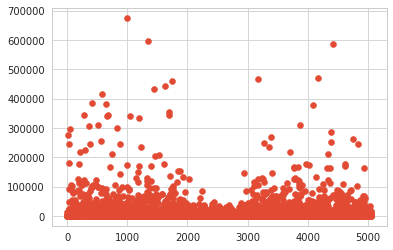

In [ ]:
y = np.array(adf["album_listens"])
x = np.arange(len(y))
plt.scatter(x, y)
plt.show()

In [ ]:
def critical(data, alpha):
    n = len(data)
    significance_level = alpha / (n)  #possibile anche => alpha / 2n
    t = stats.t.isf(significance_level, n-2)
    g_test = ((n-1) / np.sqrt(n)) * (np.sqrt(t**2 / (n-2 + t**2)))
    return g_test

In [ ]:
def grubbs(data):
    relative_values = abs(data - data.mean())
    index = relative_values.argmax()
    value = relative_values[index]
    g = value / data.std()
    return g

In [ ]:
#identica alternativa
#def grubbs (valori):
 #   g = max(abs(valori - np.mean(valori))) / np.std (valori)
  #  return g

In [ ]:
#valori = un np.array
#stampa = se 0 stampa, se un qualsiasi altro numero ritorna la lista nel caso si debba lavorarci sopra

def listaOutliers (valori, alpha, stampa):
    y = valori
    x = np.arange(len(y))
    listaOuts = []
    valori = np.append(valori,0)
    array = np.sort(valori)[::-1]
    for i in range(len(array)-1):
                     Gcalc = grubbs(array)
                     Gcritical = critical(array, alpha) 
                     listaOuts.append([array[0], Gcalc, Gcritical])
                     array = np.delete(array, 0)              
                        
    if stampa == 0: 
        d = 0
        c = 0
        print("Threshold con alpha =", alpha)
        print("n Valore || Valore di Grubbs || Critical (one-sided) || Status")
        for i in listaOuts:
            if i[1] >= i[2]:
                status = "Outlier"
                d = d +1
            else:
                status = "Inlier"
            print(c, i[0], "||", i[1], "||", i[2], "||", status)
            c = c +1
        print("Outlier trovati:", d)
        print("Contaminazione:", d / len(listaOuts))
        plt.scatter(x, y)
        plt.show()
        
    else:
         return listaOuts

In [ ]:
#acousticness         1306 non-null   float64 
#danceability         1306 non-null   float64 
#energy               1306 non-null   float64 
#instrumentalness     1306 non-null   float64 
#liveness             1306 non-null   float64 
#speechiness          1306 non-null   float64 
#tempo                1306 non-null   float64 
#valence              1306 non-null   float64 
#artist_discovery     1306 non-null   float64 
#artist_familiarity   1306 non-null   float64 
#artist_hotttnesss    1306 non-null   float64 
#song_currency        1306 non-null   float64 
#song_hotttnesss      1306 non-null   float64 

Streaming output truncated to the last 5000 lines.
57 22057.0 || 7.02345368387864 || 4.261180915535899 || Outlier
58 21961.0 || 7.02514283980242 || 4.261135632455409 || Outlier
59 21936.5 || 7.05209727284634 || 4.261090339786708 || Outlier
60 21781.0 || 7.032662738938898 || 4.261045037525829 || Outlier
61 21697.0 || 7.038316702038251 || 4.260999725668796 || Outlier
62 21685.5 || 7.070049638788242 || 4.260954404211635 || Outlier
63 21596.5 || 7.0741789176527075 || 4.260909073150365 || Outlier
64 21367.0 || 7.0270718519937585 || 4.260863732481006 || Outlier
65 21237.0 || 7.015245393854898 || 4.2608183821995755 || Outlier
66 21076.0 || 6.991620544869268 || 4.260773022302086 || Outlier
67 20996.0 || 6.9972808842254315 || 4.260727652784548 || Outlier
68 20994.0 || 7.031840783251116 || 4.260682273642977 || Outlier
69 20973.5 || 7.060025440106294 || 4.260636884873371 || Outlier
70 20946.5 || 7.086172388673193 || 4.26059148647174 || Outlier
71 20620.666666666668 || 7.000111738279304 || 4.26054

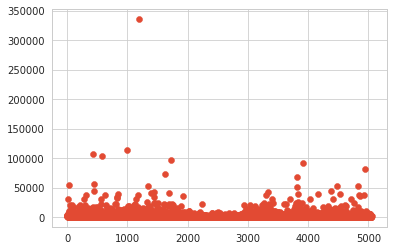

In [ ]:
classe = 'track_listens'
alpha = 0.05

#sostituire a classe la feature che si vuole analizzare e settare l'eventuale alpha
#stampa in automatico lista con analisi degli Outs + grafico. Non modificare il resto!

mini = pd.DataFrame() 

mini[classe] = adf[classe]

mini = mini.dropna()

analisiOuts = np.array(mini[classe])

listaOutliers(analisiOuts, alpha, 0)

del mini


#NOTE SULLE FEATURES DI ECHONEST:
#la maggior parte sono OK
#liveness, speechiness effettivamente hanno outs
#tempo è stranissimo
#artist_discovery & artist_hotttnesss: hanno 3 valori a 0
#song_currency & song_hotttnesss: hanno tanti valori a 0


Streaming output truncated to the last 5000 lines.
57 164697 || 8.10584546538033 || 4.261180915535899 || Outlier
58 164215 || 8.134722760023484 || 4.261135632455409 || Outlier
59 164051 || 8.181126513424614 || 4.261090339786708 || Outlier
60 163474 || 8.206072537945351 || 4.261045037525829 || Outlier
61 152895 || 7.686243805891878 || 4.260999725668796 || Outlier
62 152563 || 7.714689360676327 || 4.260954404211635 || Outlier
63 150742 || 7.661447460924345 || 4.260909073150365 || Outlier
64 148712 || 7.5950724967462016 || 4.260863732481006 || Outlier
65 148469 || 7.626558354199734 || 4.2608183821995755 || Outlier
66 143026 || 7.366795438731472 || 4.260773022302086 || Outlier
67 138574 || 7.156817101758619 || 4.260727652784548 || Outlier
68 133290 || 6.895009358561889 || 4.260682273642977 || Outlier
69 132064 || 6.8589750442378765 || 4.260636884873371 || Outlier
70 130823 || 6.821241948029002 || 4.26059148647174 || Outlier
71 130511 || 6.836052451451746 || 4.260546078434083 || Outlier
72 

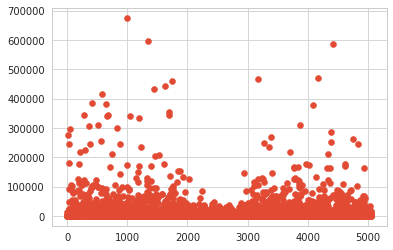

In [ ]:
classe = 'album_listens'
alpha = 0.05

#sostituire a classe la feature che si vuole analizzare e settare l'eventuale alpha
#stampa in automatico lista con analisi degli Outs + grafico. Non modificare il resto!

mini = pd.DataFrame() 

mini[classe] = adf[classe]

mini = mini.dropna()

analisiOuts = np.array(mini[classe])

listaOutliers(analisiOuts, alpha, 0)

del mini


#NOTE SULLE FEATURES DI ECHONEST:
#la maggior parte sono OK
#liveness, speechiness effettivamente hanno outs
#tempo è stranissimo
#artist_discovery & artist_hotttnesss: hanno 3 valori a 0
#song_currency & song_hotttnesss: hanno tanti valori a 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


Streaming output truncated to the last 5000 lines.
57 10 || 6.204446117707294 || 4.261180915535899 || Outlier
58 10 || 6.22910176619151 || 4.261135632455409 || Outlier
59 10 || 6.254053705161095 || 4.261090339786708 || Outlier
60 10 || 6.279307916834149 || 4.261045037525829 || Outlier
61 10 || 6.304870553902593 || 4.260999725668796 || Outlier
62 10 || 6.330747945829386 || 4.260954404211635 || Outlier
63 10 || 6.356946605432422 || 4.260909073150365 || Outlier
64 10 || 6.383473235770628 || 4.260863732481006 || Outlier
65 10 || 6.410334737348819 || 4.2608183821995755 || Outlier
66 10 || 6.437538215658874 || 4.260773022302086 || Outlier
67 9 || 5.757681427841184 || 4.260727652784548 || Outlier
68 9 || 5.7774895310513905 || 4.260682273642977 || Outlier
69 9 || 5.797503488019285 || 4.260636884873371 || Outlier
70 9 || 5.817726889152167 || 4.26059148647174 || Outlier
71 9 || 5.838163413144609 || 4.260546078434083 || Outlier
72 9 || 5.858816829789443 || 4.260500660756399 || Outlier
73 9 || 5.8

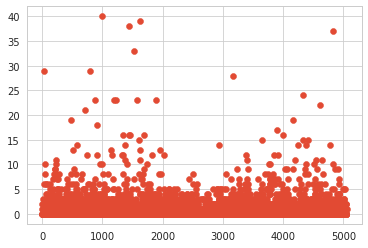

In [ ]:
classe = 'album_favorites'
alpha = 0.05

#sostituire a classe la feature che si vuole analizzare e settare l'eventuale alpha
#stampa in automatico lista con analisi degli Outs + grafico. Non modificare il resto!

mini = pd.DataFrame() 

mini[classe] = adf[classe]

mini = mini.dropna()

analisiOuts = np.array(mini[classe])

listaOutliers(analisiOuts, alpha, 0)

del mini


#NOTE SULLE FEATURES DI ECHONEST:
#la maggior parte sono OK
#liveness, speechiness effettivamente hanno outs
#tempo è stranissimo

#QUESTI ELIMINATI:
#artist_discovery & artist_hotttnesss: hanno 3 valori a 0
#song_currency & song_hotttnesss: hanno tanti valori a 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


Streaming output truncated to the last 5000 lines.
57 328 || 9.023329788932118 || 4.261180915535899 || Outlier
58 328 || 9.098648025064222 || 4.261135632455409 || Outlier
59 328 || 9.175884361354928 || 4.261090339786708 || Outlier
60 328 || 9.255121617420869 || 4.261045037525829 || Outlier
61 328 || 9.336447707302582 || 4.260999725668796 || Outlier
62 245 || 6.923944574738807 || 4.260954404211635 || Outlier
63 245 || 6.958123188378338 || 4.260909073150365 || Outlier
64 245 || 6.992812997810542 || 4.260863732481006 || Outlier
65 245 || 7.028026874346787 || 4.2608183821995755 || Outlier
66 245 || 7.063778147634905 || 4.260773022302086 || Outlier
67 245 || 7.100080626859102 || 4.260727652784548 || Outlier
68 245 || 7.136948623150754 || 4.260682273642977 || Outlier
69 245 || 7.1743969732928035 || 4.260636884873371 || Outlier
70 245 || 7.212441064806823 || 4.26059148647174 || Outlier
71 245 || 7.251096862519165 || 4.260546078434083 || Outlier
72 245 || 7.290380936710337 || 4.260500660756399

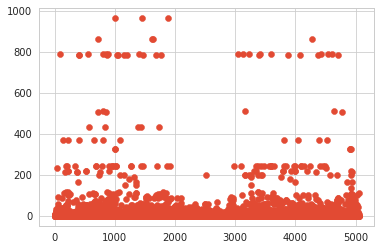

In [ ]:
classe = 'artist_favorites'
alpha = 0.05

#sostituire a classe la feature che si vuole analizzare e settare l'eventuale alpha
#stampa in automatico lista con analisi degli Outs + grafico. Non modificare il resto!

mini = pd.DataFrame() 

mini[classe] = adf[classe]

mini = mini.dropna()

analisiOuts = np.array(mini[classe])

listaOutliers(analisiOuts, alpha, 0)

del mini


In [ ]:
adf["popularity"] = np.nan
for i in range(len(adf)):
    if (adf["album_favorites"][i:i+1] >= 5).any() :
        adf["popularity"][i:i+1] = 1
        adf["popularity"][i:i+1].value = 1
    else:
        adf["popularity"][i:i+1] = 0
        adf["popularity"][i:i+1].value = 0

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/

In [ ]:
from collections import Counter
z = adf["popularity"]
Counter(z)

Counter({0.0: 4820, 1.0: 235})

In [ ]:
soloEcho = adf.copy()

In [ ]:
soloEcho = soloEcho.dropna()

In [ ]:
from collections import Counter
z = soloEcho["popularity"]
Counter(z)

Counter({0.0: 1216, 1.0: 90})

In [ ]:
#%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import LocalOutlierFactor


from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor





In [ ]:
#Creazione del mini-DF
backup = df

mini = pd.DataFrame()

mini['popularity'] = adf['popularity'] #basato su album_favorites (popular >= 10)
mini['album_listens'] = adf['album_listens']
mini['tracks_listens'] = adf['track_listens']

df = mini

class_name = 'popularity'

attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [ ]:
mini.to_csv("primaDegliOutlierPerOPTICS.csv")


In [ ]:
stop

NameError: ignored

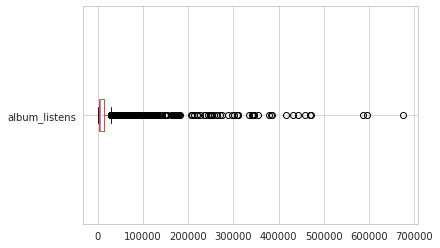

In [ ]:
boxplot = adf.boxplot(column=(['album_listens']), vert=False)

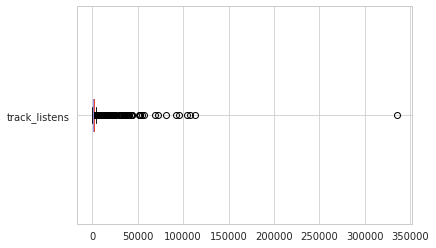

In [ ]:
boxplot2 = adf.boxplot(column=(['track_listens']), vert=False)

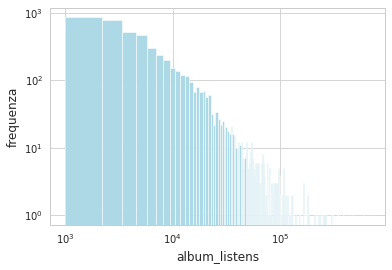

In [ ]:
plt.hist(adf["album_listens"], bins='auto', color='lightblue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('album_listens')
plt.ylabel('frequenza')
plt.show()

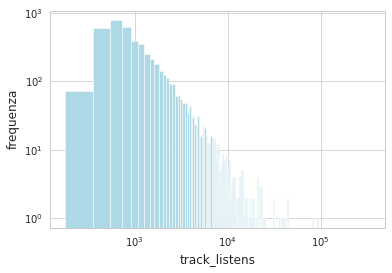

In [ ]:
plt.hist(adf["track_listens"], bins='auto', color='lightblue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('track_listens')
plt.ylabel('frequenza')
plt.show()

In [ ]:
#Iniziamo la rimozione degli outliers
Q1 = df["tracks_listens"].quantile(0.25) 
Q3 = df["tracks_listens"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)

print(Lower_Fence)

print(Upper_Fence)

outs = len(df) - len(df[~((df ["tracks_listens"] < Lower_Fence) |(df["tracks_listens"] > Upper_Fence))])

print("TRACKS - Outliers:", outs, "Contaminazione:", outs/len(df))

contaminationTracks = outs/len(df)



#Iniziamo la rimozione degli outliers
Q1 = df["album_listens"].quantile(0.25) 
Q3 = df["album_listens"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)

print(Lower_Fence)

print(Upper_Fence)

outs = len(df) - len(df[~((df ["album_listens"] < Lower_Fence) |(df["album_listens"] > Upper_Fence))])

print("ALBUM - Outliers:", outs, "Contaminazione:", outs/len(df))

1555.041666666667
-1662.0625000000005
4558.104166666668
TRACKS - Outliers: 567 Contaminazione: 0.11216617210682493
10233.0
-12558.0
28374.0
ALBUM - Outliers: 529 Contaminazione: 0.104648862512364


In [ ]:
box = df.copy()

In [ ]:
!pip install pyod

     |████████████████████████████████| 102kB 4.1MB/s 
  Created wheel for pyod: filename=pyod-0.8.7-cp37-none-any.whl size=115979 sha256=2bbe67c9db5743c9b33e9f706024c9a8508d2845a6d39018cef635ac64ed0405
  Stored in directory: /root/.cache/pip/wheels/b7/8a/c9/5fe3f32692ad445fe573cf5b953d7a0d55dc1f7c8e229ebda0
Successfully built pyod


In [ ]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.loci import LOCI
from pyod.models.auto_encoder import AutoEncoder

In [ ]:
#LOF

In [ ]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outliers = clf.fit_predict(X)


In [ ]:
len(clf.negative_outlier_factor_)

5055

In [ ]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 506, 4549]))

In [ ]:
out = np.where(outliers==-1)
len (out[0])

506

In [ ]:
np.max(clf.negative_outlier_factor_[np.where(outliers==-1)])

-1.1743021992592586

In [ ]:
np.min(clf.negative_outlier_factor_[np.where(outliers==-1)])

-7.451876319522422

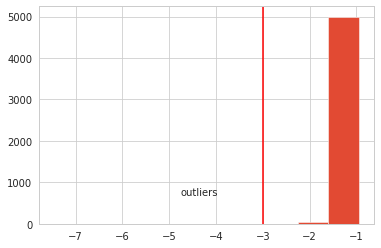

In [ ]:
#da fixare

plt.hist(clf.negative_outlier_factor_)
plt.axvline(-3, c='red')
plt.text(-4.75, 700, 'outliers')
plt.show()

In [ ]:
len(clf.negative_outlier_factor_)

5055

In [ ]:
comp = df

#comp = pd.DataFrame(index=adf.index)

comp['LOFlabel'] = 0
for i in np.where(outliers==-1):
    comp['LOFlabel'][i] = 1
    comp['LOFlabel'].values[i] = 1
    
comp['LOFscore'] = clf.negative_outlier_factor_

comp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,popularity,album_listens,tracks_listens,LOFlabel,LOFscore
0,0.0,1190,1190.000000,0,-1.036314
1,0.0,2596,2598.000000,0,-1.007161
2,0.0,1785,1787.000000,0,-1.003112
3,0.0,4966,1672.000000,0,-0.993239
4,0.0,2075,2080.000000,0,-1.041310
...,...,...,...,...,...
5050,0.0,6158,784.428571,0,-0.964486
5051,0.0,7230,1446.000000,0,-0.992570
5052,0.0,4021,613.750000,0,-0.970381
5053,0.0,1240,1240.000000,0,-0.974512


In [ ]:
len(clf.negative_outlier_factor_)

5055

In [ ]:
# Generate train data
X_inliers = X[np.where(outliers!=-1)]
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = X[np.where(outliers==-1)]
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)

# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).

#y_pred = clf.fit_predict(Xa)
#n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

In [ ]:
Xa.shape



(9604, 2)

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.decomposition import PCA



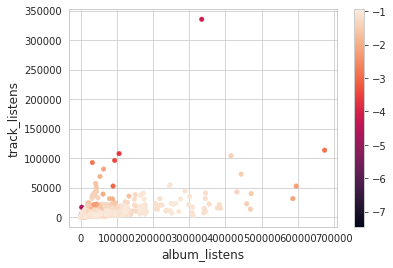

In [ ]:

plt.scatter(X[:, 0], X[:, 1], s=20, c=clf.negative_outlier_factor_) #, cmap='RdYlGn')
plt.ylabel("track_listens")
plt.xlabel("album_listens")
plt.colorbar()
plt.show()

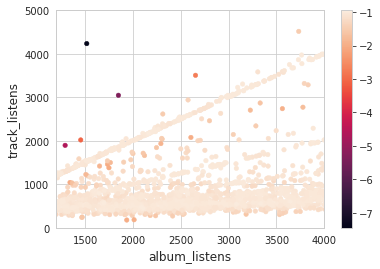

In [ ]:

plt.scatter(X[:, 0], X[:, 1], s=20, c=clf.negative_outlier_factor_) #, cmap='RdYlGn')
plt.ylabel("track_listens")
plt.xlabel("album_listens")
plt.xlim((1200, 4000))
plt.ylim((0, 5000))
plt.colorbar()
plt.show()

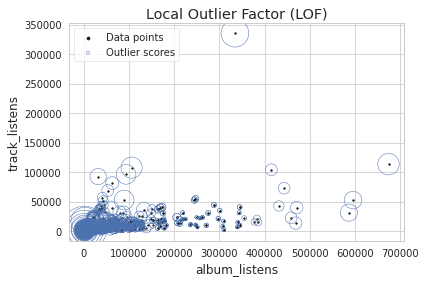

In [ ]:
#np.random.seed(42)

# Generate train data
X_inliers = X[np.where(outliers!=-1)]
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = X[np.where(outliers==-1)]
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outliers = clf.fit_predict(X)

# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(Xa)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(Xa[:, 0], Xa[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xa[:, 0], Xa[:, 1], s=2000 * radius, edgecolors='b',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
#plt.xlim((0, 125000))
#plt.ylim((0, 15000))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [10]
#plt.xlabel('album_listens')
plt.ylabel('track_listens')
plt.xlabel('album_listens')
plt.show()

In [ ]:
#vicini: 20, valore migliore per la documentazione
clf = ABOD(contamination=0.1, n_neighbors=20)
clf.fit(X)

ABOD(contamination=0.1, method='fast', n_neighbors=20)

In [ ]:
clf.decision_scores_
max(clf.decision_scores_)


-1.8322791635612787e-24

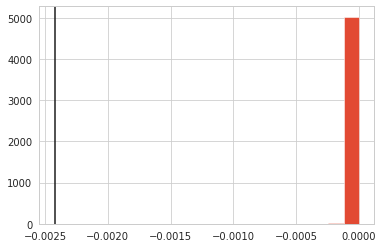

In [ ]:
#da fixare
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [ ]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([4559,  496]))

In [ ]:
len(clf.decision_scores_[np.where(outliers==0)])

4559

In [ ]:
len(clf.decision_scores_)

5055

In [ ]:
clf.decision_scores_

array([-2.40128488e-04, -3.31514352e-07, -8.15973221e-07, ...,
       -9.51548414e-07, -2.10178925e-03, -4.34756050e-09])

In [ ]:
comp2 = comp

comp2['ABODlabel'] = 0
for i in np.where(outliers==1):
    comp2['ABODlabel'][i] = 1
    comp2['ABODlabel'].values[i] = 1
    
comp2['ABODscore'] = 0.0
for i in range(len(df)):
    df['ABODscore'][i] = clf.decision_scores_[i]
    df['ABODscore'].values[i] = clf.decision_scores_[i]

comp2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,popularity,album_listens,tracks_listens,LOFlabel,LOFscore,ABODlabel,ABODscore
0,0.0,1190,1190.000000,0,-1.036314,0,-2.401285e-04
1,0.0,2596,2598.000000,0,-1.007161,0,-3.315144e-07
2,0.0,1785,1787.000000,0,-1.003112,0,-8.159732e-07
3,0.0,4966,1672.000000,0,-0.993239,0,-1.352891e-08
4,0.0,2075,2080.000000,0,-1.041310,0,-1.610636e-06
...,...,...,...,...,...,...,...
5050,0.0,6158,784.428571,0,-0.964486,0,-7.055661e-08
5051,0.0,7230,1446.000000,0,-0.992570,0,-6.812567e-07
5052,0.0,4021,613.750000,0,-0.970381,0,-9.515484e-07
5053,0.0,1240,1240.000000,0,-0.974512,0,-2.101789e-03


In [ ]:
#FOREST

In [ ]:
%matplotlib inline
#import matplotlib.pyplot as plt
#import numpy as np
#from scipy.stats import multivariate_normal
#import random as rn
#import eif as iso
#import seaborn as sb
sb.set_style(style="whitegrid")
sb.set_color_codes()
#import scipy.ndimage
#from scipy.interpolate import griddata
#import numpy.ma as ma
#from numpy.random import uniform, seed


In [ ]:
x = np.array(comp2['album_listens'])
y = np.array(comp2['tracks_listens'])

In [ ]:
def getDepth(x, root, d):
    n = root.n
    p = root.p
    if root.ntype == 'exNode':
        return d
    else:
        if (x-p).dot(n) < 0:
            return getDepth(x,root.left,d+1)
        else:
            return getDepth(x,root.right,d+1)
        
def getVals(forest,x,sorted=True):
    theta = np.linspace(0,2*np.pi, forest.ntrees)
    r = []
    for i in range(forest.ntrees):
        temp = forest.compute_paths_single_tree(np.array([x]),i)
        r.append(temp[0])
    if sorted:
        r = np.sort(np.array(r))
    return r, theta

In [ ]:
X=np.array([x,y]).T

In [ ]:
F0  = iso.iForest(X, ntrees=200, sample_size=512, ExtensionLevel=0, seed = 42) # ExtensionLevel=0 is the same as regular Isolation Forest
F1  = iso.iForest(X, ntrees=200, sample_size=512, ExtensionLevel=1, seed = 42)

In [ ]:
xxx = np.array([[0,0.]])
SL0 = F0.compute_paths_single_tree(xxx, 0)

In [ ]:
S0 = F0.compute_paths(X_in=X)
S1 = F1.compute_paths(X_in=X)


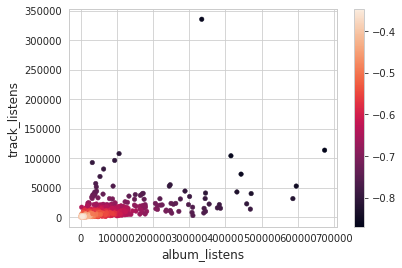

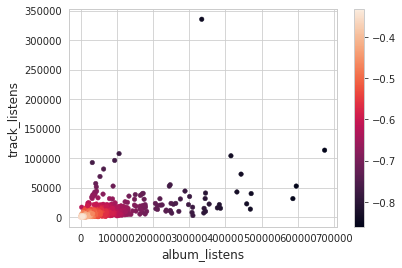

In [ ]:

plt.scatter(X[:, 0], X[:, 1], s=20, c=-S0)


plt.ylabel("track_listens")
plt.xlabel("album_listens")
plt.colorbar()
plt.show()


plt.scatter(X[:, 0], X[:, 1], s=20, c=-S1)


plt.ylabel("track_listens")
plt.xlabel("album_listens")
plt.colorbar()
plt.show()

In [ ]:
comp3 = comp2
    
comp3['Forest0Score'] = S0 #ss0
comp3['Forest1Score'] = S1 #ss1


comp3

,popularity,album_listens,tracks_listens,LOFlabel,LOFscore,ABODlabel,ABODscore,Forest0Score,Forest1Score
0,0.0,1190,1190.000000,0,-1.036314,0,-2.401285e-04,0.383912,0.359728
1,0.0,2596,2598.000000,0,-1.007161,0,-3.315144e-07,0.401643,0.375845
2,0.0,1785,1787.000000,0,-1.003112,0,-8.159732e-07,0.393269,0.362842
3,0.0,4966,1672.000000,0,-0.993239,0,-1.352891e-08,0.367912,0.348539
4,0.0,2075,2080.000000,0,-1.041310,0,-1.610636e-06,0.401066,0.367821
...,...,...,...,...,...,...,...,...,...
5050,0.0,6158,784.428571,0,-0.964486,0,-7.055661e-08,0.359026,0.348217
5051,0.0,7230,1446.000000,0,-0.992570,0,-6.812567e-07,0.365355,0.352000
5052,0.0,4021,613.750000,0,-0.970381,0,-9.515484e-07,0.355656,0.336841
5053,0.0,1240,1240.000000,0,-0.974512,0,-2.101789e-03,0.382031,0.358879


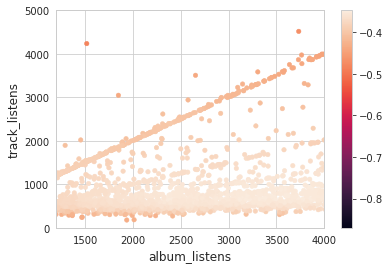

In [ ]:

plt.scatter(X[:, 0], X[:, 1], s=20,  c=-S0)
plt.ylabel("track_listens")
plt.xlabel("album_listens")
plt.xlim((1200, 4000))
plt.ylim((0, 5000))
plt.colorbar()
plt.show()

In [ ]:
#Integriamo Grubbs

In [ ]:
classe = 'track_listens'
alpha = 0.05

#sostituire a classe la feature che si vuole analizzare e settare l'eventuale alpha
#stampa in automatico lista con analisi degli Outs + grafico. Non modificare il resto!

mini = pd.DataFrame() 

mini[classe] = adf[classe]

mini = mini.dropna()

analisiOuts = np.array(mini[classe])

abc = listaOutliers(analisiOuts, alpha, 1)

del mini



In [ ]:
listaGrubbs = []
for i in range (len(adf)):
    listaGrubbs.append(abc[i][1])

In [ ]:
#ci mette un po', il tempo di un caffè
comp3['TracksGLabel'] = 0
comp3['TracksGScore'] = 0.0
for i in range(len(adf)):
    for j in range(len(adf)):
        if ((comp3["tracks_listens"].values[i] == abc[j][0])):
            comp3['TracksGScore'].values[i] = abc[j][1]
            if (abc[j][1] > abc[j][2]):
                comp3['TracksGLabel'].values[i] = 1

In [ ]:
classe = 'album_listens'
alpha = 0.05

#sostituire a classe la feature che si vuole analizzare e settare l'eventuale alpha
#stampa in automatico lista con analisi degli Outs + grafico. Non modificare il resto!

mini = pd.DataFrame() 

mini[classe] = adf[classe]

mini = mini.dropna()

analisiOuts = np.array(mini[classe])

abc = listaOutliers(analisiOuts, alpha, 1)

del mini

listaGrubbs = []
for i in range (len(adf)):
    listaGrubbs.append(abc[i][1])
    
comp3['AlbumGLabel'] = 0
comp3['AlbumGScore'] = 0.0
for i in range(len(adf)):
    for j in range(len(adf)):
        if ((comp3["album_listens"].values[i] == abc[j][0])):
            comp3['AlbumGScore'].values[i] = abc[j][1]
            if (abc[j][1] > abc[j][2]):
                comp3['AlbumGLabel'].values[i] = 1

In [ ]:
#comp.sort_values(by='LOFscore')[50:100]

In [ ]:
#comp.sort_values(by='Forest1Score', ascending=False)[50:110]

In [ ]:
#comp.sort_values(by='TracksGScore', ascending=False)[0:10]

In [ ]:
#comp.sort_values(by='TracksGScore', ascending=False)[0:10]

In [ ]:
#comp.sort_values(by='TracksGScore', ascending=False)[0:10]

In [ ]:
#comp.sort_values(by='Forest1Score', ascending=False)[0:10]

In [ ]:
#KNN

In [ ]:
clf = KNN(n_neighbors=20)
clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=20, p=2,
  radius=1.0)

In [ ]:
clf.decision_scores_

array([ 66.70832032, 152.74161188, 133.64505228, ...,  69.56164532,
        55.90169944, 165.68041526])

In [ ]:
1+1

2

In [ ]:
anomlay_score = clf.decision_function(X)

In [ ]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([4558,  497]))

In [ ]:
print(np.mean(anomlay_score[np.where(outliers==1)]))
print(np.mean(anomlay_score[np.where(outliers==0)]))
print(np.mean(clf.decision_scores_[np.where(outliers==1)]))
print(np.mean(clf.decision_scores_[np.where(outliers==0)]))

15914.864322629843
335.62191176739157
16375.655930709552
345.00134640912506


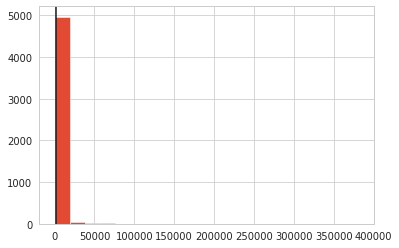

In [ ]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

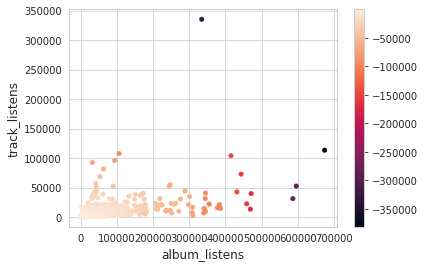

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=20, c=-clf.decision_scores_)


plt.ylabel("track_listens")
plt.xlabel("album_listens")
plt.colorbar()
plt.show()

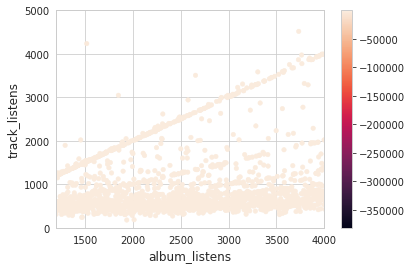

In [ ]:

plt.scatter(X[:, 0], X[:, 1], s=20,  c=-clf.decision_scores_)
plt.ylabel("track_listens")
plt.xlabel("album_listens")
plt.xlim((1200, 4000))
plt.ylim((0, 5000))
plt.colorbar()
plt.show()

In [ ]:

comp['KNNlabel'] = 0
for i in np.where(outliers==1):
    comp['KNNlabel'][i] = 1
    comp['KNNlabel'].values[i] = 1
    
comp['KNNscore'] = anomlay_score

#comp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#comp.sort_values(by='KNNscore', ascending=False)[0:10]

In [ ]:
AK = 0
AL = 0
KL = 0


for i in range(len(comp)):
    if (((comp["ABODlabel"].values[i]) == 1) & (comp["LOFlabel"].values[i] == 1)):
        AL = AL + 1
    if (((comp["KNNlabel"].values[i]) == 1) & (comp["LOFlabel"].values[i] == 1)):
        KL = KL + 1
    if (((comp["ABODlabel"].values[i]) == 1) & (comp["KNNlabel"].values[i] == 1)):
        AK = AK + 1


        
print("In comune ABOD - LOF:", AL)
print("In comune KNN - LOF:", KL)
print("In comune ABOD - KNN:", AK)


In comune ABOD - LOF: 160
In comune KNN - LOF: 148
In comune ABOD - KNN: 450


In [ ]:
print("LOF:", Counter(comp['LOFlabel']))
print("ABOD:", Counter(comp['ABODlabel']))
print("KNN:", Counter(comp['KNNlabel']))
print("---")
print("Grubbs:")
print("Tracks:", Counter(comp['TracksGLabel']))
print("Album:", Counter(comp['AlbumGLabel']))


LOF: Counter({0: 4549, 1: 506})
ABOD: Counter({0: 4559, 1: 496})
KNN: Counter({0: 4558, 1: 497})
---
Grubbs:
Tracks: Counter({0: 2643, 1: 2412})
Album: Counter({0: 3632, 1: 1423})


In [ ]:
comp.sort_values(by='LOFscore')[0:30]


,popularity,album_listens,tracks_listens,LOFlabel,LOFscore,ABODlabel,ABODscore,Forest0Score,Forest1Score,TracksGLabel,TracksGScore,AlbumGLabel,AlbumGScore,KNNlabel,KNNscore
2480,0.0,1518,4235.916667,1,-7.451876,1,-1.915871e-15,0.481510,0.446264,0,3.377608,1,7.710906,0,1920.489783
3696,0.0,1849,3047.285714,1,-5.363618,1,-2.530902e-14,0.436968,0.408822,0,2.960468,1,5.606017,0,850.444806
100,0.0,2544,16646.200000,1,-4.681263,1,-7.160974e-19,0.639920,0.619665,1,6.370861,0,3.868852,1,10195.139001
1744,0.0,1292,1896.000000,1,-4.628211,0,-2.533026e-12,0.406828,0.380366,0,2.493712,1,9.587554,0,429.057106
1190,1.0,334514,335215.000000,1,-4.140101,1,-1.832279e-24,0.859018,0.841035,1,45.246565,1,11.849637,1,323167.324455
423,1.0,105913,107451.000000,1,-3.712962,1,-2.906319e-20,0.810527,0.778070,1,19.241466,1,6.267875,1,88844.000360
1727,0.0,93791,95940.000000,1,-3.426374,1,-9.844995e-20,0.804475,0.768427,1,18.493557,1,6.055716,1,77728.185911
1987,0.0,1455,2020.000000,1,-3.077232,0,-6.600433e-12,0.412085,0.379058,0,2.572629,1,8.317790,0,408.031862
4483,0.0,89380,52455.500000,1,-3.076974,1,-2.533430e-19,0.762107,0.712506,1,11.958832,1,5.909994,1,39316.723223
996,1.0,674347,113310.833333,1,-2.908330,1,-8.439058e-23,0.870354,0.860555,1,19.532286,1,17.730417,1,380690.197977


In [ ]:
comp.sort_values(by='AlbumGScore', ascending=False)[0:20]

,popularity,album_listens,tracks_listens,LOFlabel,LOFscore,ABODlabel,ABODscore,Forest0Score,Forest1Score,TracksGLabel,TracksGScore,AlbumGLabel,AlbumGScore,KNNlabel,KNNscore
996,1.0,674347,113310.833333,1,-2.908330,1,-8.439058e-23,0.870354,0.860555,1,19.532286,1,17.730417,1,380690.197977
4421,1.0,586634,31185.000000,1,-2.156789,1,-2.073957e-21,0.820490,0.855187,1,9.041806,1,16.301573,1,277988.128777
1343,1.0,595875,52460.071429,1,-2.221916,1,-2.127974e-21,0.847071,0.859530,1,11.792728,1,16.131375,1,290075.938930
3164,1.0,468967,13411.000000,1,-1.501509,1,-5.231268e-20,0.789749,0.834047,1,5.757358,1,13.546135,1,161456.665108
1739,1.0,458874,22302.750000,1,-1.455434,1,-7.176787e-20,0.801163,0.832806,1,7.038008,1,13.493913,1,151965.225048
4167,1.0,471199,39722.583333,1,-1.519585,1,-2.733656e-20,0.828845,0.838783,1,9.932201,1,13.368427,1,166690.757835
1630,1.0,443286,72685.000000,1,-1.440328,1,-1.318804e-20,0.855442,0.834545,1,15.333597,1,13.263139,1,150499.816894
1440,1.0,431787,42479.333333,1,-1.341853,1,-3.237037e-20,0.826379,0.827611,1,10.231547,1,13.139712,1,135603.541990
576,1.0,415275,103803.000000,1,-1.413460,1,-2.287022e-21,0.859018,0.835042,1,19.294765,1,12.842742,1,144309.771076
4084,1.0,377713,15493.000000,1,-1.175611,1,-1.310755e-18,0.780857,0.809321,1,5.996900,1,12.195553,1,95966.452180


In [ ]:
comp.sort_values(by='ABODscore', ascending=False)[0:20]

,popularity,album_listens,tracks_listens,LOFlabel,LOFscore,ABODlabel,ABODscore,Forest0Score,Forest1Score,TracksGLabel,TracksGScore,AlbumGLabel,AlbumGScore,KNNlabel,KNNscore
1190,1.0,334514,335215.000000,1,-4.140101,1,-1.832279e-24,0.859018,0.841035,1,45.246565,1,11.849637,1,323167.324455
996,1.0,674347,113310.833333,1,-2.908330,1,-8.439058e-23,0.870354,0.860555,1,19.532286,1,17.730417,1,380690.197977
4421,1.0,586634,31185.000000,1,-2.156789,1,-2.073957e-21,0.820490,0.855187,1,9.041806,1,16.301573,1,277988.128777
1343,1.0,595875,52460.071429,1,-2.221916,1,-2.127974e-21,0.847071,0.859530,1,11.792728,1,16.131375,1,290075.938930
576,1.0,415275,103803.000000,1,-1.413460,1,-2.287022e-21,0.859018,0.835042,1,19.294765,1,12.842742,1,144309.771076
1630,1.0,443286,72685.000000,1,-1.440328,1,-1.318804e-20,0.855442,0.834545,1,15.333597,1,13.263139,1,150499.816894
3911,0.0,31847,92264.000000,1,-2.804914,1,-1.898853e-20,0.795344,0.765388,1,18.401958,0,3.740826,1,69538.326475
4167,1.0,471199,39722.583333,1,-1.519585,1,-2.733656e-20,0.828845,0.838783,1,9.932201,1,13.368427,1,166690.757835
423,1.0,105913,107451.000000,1,-3.712962,1,-2.906319e-20,0.810527,0.778070,1,19.241466,1,6.267875,1,88844.000360
1440,1.0,431787,42479.333333,1,-1.341853,1,-3.237037e-20,0.826379,0.827611,1,10.231547,1,13.139712,1,135603.541990


In [ ]:
comp.sort_values(by='Forest1Score', ascending=False)[0:30]

,popularity,album_listens,tracks_listens,LOFlabel,LOFscore,ABODlabel,ABODscore,Forest0Score,Forest1Score,TracksGLabel,TracksGScore,AlbumGLabel,AlbumGScore,KNNlabel,KNNscore
996,1.0,674347,113310.833333,1,-2.908330,1,-8.439058e-23,0.870354,0.860555,1,19.532286,1,17.730417,1,380690.197977
1343,1.0,595875,52460.071429,1,-2.221916,1,-2.127974e-21,0.847071,0.859530,1,11.792728,1,16.131375,1,290075.938930
4421,1.0,586634,31185.000000,1,-2.156789,1,-2.073957e-21,0.820490,0.855187,1,9.041806,1,16.301573,1,277988.128777
1190,1.0,334514,335215.000000,1,-4.140101,1,-1.832279e-24,0.859018,0.841035,1,45.246565,1,11.849637,1,323167.324455
4167,1.0,471199,39722.583333,1,-1.519585,1,-2.733656e-20,0.828845,0.838783,1,9.932201,1,13.368427,1,166690.757835
576,1.0,415275,103803.000000,1,-1.413460,1,-2.287022e-21,0.859018,0.835042,1,19.294765,1,12.842742,1,144309.771076
1630,1.0,443286,72685.000000,1,-1.440328,1,-1.318804e-20,0.855442,0.834545,1,15.333597,1,13.263139,1,150499.816894
3164,1.0,468967,13411.000000,1,-1.501509,1,-5.231268e-20,0.789749,0.834047,1,5.757358,1,13.546135,1,161456.665108
1739,1.0,458874,22302.750000,1,-1.455434,1,-7.176787e-20,0.801163,0.832806,1,7.038008,1,13.493913,1,151965.225048
1440,1.0,431787,42479.333333,1,-1.341853,1,-3.237037e-20,0.826379,0.827611,1,10.231547,1,13.139712,1,135603.541990


In [ ]:
comp.sort_values(by='album_listens', ascending=False)[0:10]

,popularity,album_listens,tracks_listens,LOFlabel,LOFscore,ABODlabel,ABODscore,Forest0Score,Forest1Score,TracksGLabel,TracksGScore,AlbumGLabel,AlbumGScore,KNNlabel,KNNscore
996,1.0,674347,113310.833333,1,-2.908330,1,-8.439058e-23,0.870354,0.860555,1,19.532286,1,17.730417,1,380690.197977
1343,1.0,595875,52460.071429,1,-2.221916,1,-2.127974e-21,0.847071,0.859530,1,11.792728,1,16.131375,1,290075.938930
4421,1.0,586634,31185.000000,1,-2.156789,1,-2.073957e-21,0.820490,0.855187,1,9.041806,1,16.301573,1,277988.128777
4167,1.0,471199,39722.583333,1,-1.519585,1,-2.733656e-20,0.828845,0.838783,1,9.932201,1,13.368427,1,166690.757835
3164,1.0,468967,13411.000000,1,-1.501509,1,-5.231268e-20,0.789749,0.834047,1,5.757358,1,13.546135,1,161456.665108
1739,1.0,458874,22302.750000,1,-1.455434,1,-7.176787e-20,0.801163,0.832806,1,7.038008,1,13.493913,1,151965.225048
1630,1.0,443286,72685.000000,1,-1.440328,1,-1.318804e-20,0.855442,0.834545,1,15.333597,1,13.263139,1,150499.816894
1440,1.0,431787,42479.333333,1,-1.341853,1,-3.237037e-20,0.826379,0.827611,1,10.231547,1,13.139712,1,135603.541990
576,1.0,415275,103803.000000,1,-1.413460,1,-2.287022e-21,0.859018,0.835042,1,19.294765,1,12.842742,1,144309.771076
413,1.0,386386,14894.666667,1,-1.201387,1,-8.690580e-19,0.781323,0.813673,1,5.927039,1,12.118360,1,93484.041724


In [ ]:
#comp.sort_values(by='tracks_listens', ascending=False)[0:10]

In [ ]:
comp.sort_values(by='LOFscore', ascending=True)[0:50]

,popularity,album_listens,tracks_listens,LOFlabel,LOFscore,ABODlabel,ABODscore,Forest0Score,Forest1Score,TracksGLabel,TracksGScore,AlbumGLabel,AlbumGScore,KNNlabel,KNNscore
2480,0.0,1518,4235.916667,1,-7.451876,1,-1.915871e-15,0.481510,0.446264,0,3.377608,1,7.710906,0,1920.489783
3696,0.0,1849,3047.285714,1,-5.363618,1,-2.530902e-14,0.436968,0.408822,0,2.960468,1,5.606017,0,850.444806
100,0.0,2544,16646.200000,1,-4.681263,1,-7.160974e-19,0.639920,0.619665,1,6.370861,0,3.868852,1,10195.139001
1744,0.0,1292,1896.000000,1,-4.628211,0,-2.533026e-12,0.406828,0.380366,0,2.493712,1,9.587554,0,429.057106
1190,1.0,334514,335215.000000,1,-4.140101,1,-1.832279e-24,0.859018,0.841035,1,45.246565,1,11.849637,1,323167.324455
423,1.0,105913,107451.000000,1,-3.712962,1,-2.906319e-20,0.810527,0.778070,1,19.241466,1,6.267875,1,88844.000360
1727,0.0,93791,95940.000000,1,-3.426374,1,-9.844995e-20,0.804475,0.768427,1,18.493557,1,6.055716,1,77728.185911
1987,0.0,1455,2020.000000,1,-3.077232,0,-6.600433e-12,0.412085,0.379058,0,2.572629,1,8.317790,0,408.031862
4483,0.0,89380,52455.500000,1,-3.076974,1,-2.533430e-19,0.762107,0.712506,1,11.958832,1,5.909994,1,39316.723223
996,1.0,674347,113310.833333,1,-2.908330,1,-8.439058e-23,0.870354,0.860555,1,19.532286,1,17.730417,1,380690.197977


In [ ]:
LOF = 0
LOFNotPop = 0

for i in range(len(comp)):
    if (((comp["LOFlabel"].values[i]) == 1)):
        LOF = LOF + 1
        if (((comp["popularity"].values[i]) == 0)):
          LOFNotPop = LOFNotPop + 1

print ("Totali LOF:", LOF)
print ("LOF NotPop:", LOFNotPop)

Totali LOF: 506
LOF NotPop: 469


In [ ]:
ABOD = 0
ABODNotPop = 0

for i in range(len(comp)):
    if (((comp["ABODlabel"].values[i]) == 1)):
        ABOD = ABOD + 1
        if (((comp["popularity"].values[i]) == 0)):
          LOFNotPop = LOFNotPop + 1

print ("Totali ABOD:", ABOD)
print ("ABOD NotPop:", ABODNotPop)




Totali ABOD: 496
ABOD NotPop: 0


In [ ]:
KNN = 0
KNNNotPop = 0

for i in range(len(comp)):
    if (((comp["KNNlabel"].values[i]) == 1)):
        KNN = KNN + 1
        if (((comp["popularity"].values[i]) == 0)):
          KNNNotPop = KNNNotPop + 1

print ("Totali KNN:", KNN)
print ("KNN NotPop:", KNNNotPop)

Totali KNN: 497
KNN NotPop: 358


In [ ]:
KNN = 0
KNNNotPop = 0

for i in range(len(comp)):
    if (((comp["KNNlabel"].values[i]) == 1)):
        KNN = KNN + 1
        if (((comp["popularity"].values[i]) == 0)):
          KNNNotPop = KNNNotPop + 1

print ("Totali KNN:", KNN)
print ("KNN NotPop:", KNNNotPop)


Totali KNN: 497
KNN NotPop: 358


In [ ]:
comp.sort_values(by='Forest0Score', ascending=False)[499:500]

,popularity,album_listens,tracks_listens,LOFlabel,LOFscore,ABODlabel,ABODscore,Forest0Score,Forest1Score,TracksGLabel,TracksGScore,AlbumGLabel,AlbumGScore,KNNlabel,KNNscore
249,0.0,24166,6976.0,1,-1.210714,1,-3.471701e-13,0.499821,0.46018,0,4.136857,0,3.236942,1,2616.912845


In [ ]:
comp['Forest1Label'] = 0
comp['Forest0Label'] = 0

In [ ]:
F = 0
for i in range(len(comp)):
    if (((comp["Forest1Score"].values[i]) > 0.472613)):
        comp["Forest1Label"].values[i] = 1
        F = F + 1
print(F)

500


In [ ]:

F = 0
for i in range(len(comp)):
    if (((comp["Forest0Score"].values[i]) > 0.499821)):
        comp["Forest0Label"].values[i] = 1
        F = F + 1
print(F)

500


In [ ]:
AK = 0
AL = 0
KL = 0
F1A = 0
F1K = 0
F1L = 0
F0A = 0
F0K = 0
F0L = 0
FF = 0

for i in range(len(comp)):
    if (((comp["ABODlabel"].values[i]) == 1) & (comp["LOFlabel"].values[i] == 1)):
        AL = AL + 1
    if (((comp["KNNlabel"].values[i]) == 1) & (comp["LOFlabel"].values[i] == 1)):
        KL = KL + 1
    if (((comp["ABODlabel"].values[i]) == 1) & (comp["KNNlabel"].values[i] == 1)):
        AK = AK + 1
    if (((comp["ABODlabel"].values[i]) == 1) & (comp["Forest1Label"].values[i] == 1)):
        F1A = F1A + 1
    if (((comp["KNNlabel"].values[i]) == 1) & (comp["Forest1Label"].values[i] == 1)):
        F1K = F1K + 1
    if (((comp["LOFlabel"].values[i]) == 1) & (comp["Forest1Label"].values[i] == 1)):
        F1L = F1L + 1
    if (((comp["Forest0Label"].values[i]) == 1) & (comp["Forest1Label"].values[i] == 1)):
        FF = FF + 1
    if (((comp["ABODlabel"].values[i]) == 1) & (comp["Forest0Label"].values[i] == 1)):
        F0A = F0A + 1
    if (((comp["KNNlabel"].values[i]) == 1) & (comp["Forest0Label"].values[i] == 1)):
        F0K = F0K + 1
    if (((comp["LOFlabel"].values[i]) == 1) & (comp["Forest0Label"].values[i] == 1)):
        F0L = F0L + 1


        
print("In comune ABOD - LOF:", AL)
print("In comune KNN - LOF:", KL)
print("In comune ABOD - KNN:", AK)
print("In comune EIF - KNN:", F1K)
print("In comune EIF - ABOD:", F1A)
print("In comune EIF - LOF:", F1L)
print("In comune IF - KNN:", F0K)
print("In comune IF - ABOD:", F0A)
print("In comune IF - LOF:", F0L)
print("In comune IF - EIF:", FF)





In comune ABOD - LOF: 160
In comune KNN - LOF: 148
In comune ABOD - KNN: 450
In comune EIF - KNN: 470
In comune EIF - ABOD: 436
In comune EIF - LOF: 142
In comune IF - KNN: 463
In comune IF - ABOD: 427
In comune IF - LOF: 151
In comune IF - EIF: 460


In [ ]:
Out = 0
OutNotPop = 0

for i in range(len(comp)):
    if (((comp["Forest1Label"].values[i]) == 1)):
        Out = Out + 1
        if (((comp["popularity"].values[i]) == 0)):
          OutNotPop = OutNotPop + 1

print ("Totali Out:", Out)
print ("Out NotPop:", OutNotPop)


#stessa operazione fatta con gli altri label


Totali Out: 500
Out NotPop: 362


In [ ]:
comp["ToBeRemoved"] = 0

In [ ]:
for i in range(len(comp)):
    if (((comp["popularity"].values[i]) == 0)):
      if ((comp["ABODlabel"].values[i]) == 1):
          comp["ToBeRemoved"].values[i] = 1
      if ((comp["KNNlabel"].values[i]) == 1):
          comp["ToBeRemoved"].values[i] = 1
      if ((comp["LOFlabel"].values[i]) == 1):
          comp["ToBeRemoved"].values[i] = 1
      if ((comp["Forest0Label"].values[i]) == 1):
          comp["ToBeRemoved"].values[i] = 1
      if ((comp["Forest1Label"].values[i]) == 1):
          comp["ToBeRemoved"].values[i] = 1

In [ ]:
adf['ToBeRemoved'] = comp['ToBeRemoved']

In [ ]:
from collections import Counter
z = adf["ToBeRemoved"]
Counter(z)

Counter({0: 4274, 1: 781})

In [ ]:
backup = adf.copy()

In [ ]:
S T O P

In [ ]:
adf.info()

In [ ]:
#Rimuoviamo outlier
print(len(adf))
for i in reversed(range(len(adf))):
    if ((adf['track_listens'][i:i+1] > 100000).bool() | (adf["album_listens"][i:i+1] > 400000).bool()):
            adf.drop(adf.index[[i]], inplace=True)
print (len(adf))

5055
5044


In [ ]:
c = 0
print(len(adf))
for i in reversed(range(len(adf))):
    if ((adf['track_listens'][i:i+1] <= 50000).bool() & (adf["album_listens"][i:i+1] <= 200000).bool()):
      if (((adf["ToBeRemoved"].values[i]) == 1)):
        c = c +1
print (c)

5044
764


In [ ]:
s t  o p

In [ ]:
print(len(adf))
for i in reversed(range(len(adf))):
    if ((adf['track_listens'][i:i+1] <= 50.000).bool() | (adf["album_listens"][i:i+1] > 200000).bool()):
      if (((adf["ToBeRemoved"].values[i]) == 1)):
        adf.drop(adf.index[[i]], inplace=True)
print (len(adf))

5044
5034


In [ ]:
del adf['ToBeRemoved']

In [ ]:
from collections import Counter
z = adf["popularity"]
Counter(z)

In [ ]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5034 entries, 0 to 5054
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   album_title          5034 non-null   object  
 1   track_duration       5034 non-null   int64   
 2   track_listens        5034 non-null   float64 
 3   acousticness         1302 non-null   float64 
 4   danceability         1302 non-null   float64 
 5   energy               1302 non-null   float64 
 6   instrumentalness     1302 non-null   float64 
 7   liveness             1302 non-null   float64 
 8   speechiness          1302 non-null   float64 
 9   tempo                1302 non-null   float64 
 10  valence              1302 non-null   float64 
 11  artist_discovery     1302 non-null   float64 
 12  artist_familiarity   1302 non-null   float64 
 13  artist_hotttnesss    1302 non-null   float64 
 14  song_currency        1302 non-null   float64 
 15  song_hotttnesss      

In [ ]:
#One Hot di Album Type
one_hot_type = pd.get_dummies(adf['album_type'])

adf = pd.merge(adf, one_hot_type, left_index=True, right_index=True)


In [ ]:
allNumber = adf.copy()

In [ ]:
del allNumber["album_type"]


In [ ]:
#allNumber.to_csv("NeoNoOutTuttoNumeri.csv")


In [ ]:
#<--- qua a lato nella schermata di navigazione dei file fare tasto dx -> aggiorna
#sarà apparso il file csv scaricabile
#woooow


In [ ]:
del adf['Contest']

In [ ]:
adf.info()

In [ ]:
del adf['album_type']

In [ ]:
#adf.to_csv("NeoNoOutTuttoNumeri.csv")

In [ ]:
adf["Genre"] = " "
for i in range(len(adf)):
    if ((adf["Classical"].values[i] == 1.0)):
        adf["Genre"].values[i] = "Classical"
    if ((adf["Easy Listening"].values[i] == 1.0)):
        adf["Genre"].values[i] = "Easy Listening"
    if ((adf["Electronic"].values[i] == 1.0)):
        adf["Genre"].values[i] = "Electronic"
    if ((adf["Experimental"].values[i] == 1.0)):
        adf["Genre"].values[i] = "Experimental"
    if ((adf["Folk"].values[i] == 1.0)):
        adf["Genre"].values[i] = "Folk"
    if ((adf["Hip-Hop"].values[i] == 1.0)):
        adf["Genre"].values[i] = "Hip-Hop"
    if ((adf["Instrumental"].values[i] == 1.0)):
        adf["Genre"].values[i] = "Instrumental"
    if ((adf["International"].values[i] == 1.0)):
        adf["Genre"].values[i] = "International"
    if ((adf["Jazz"].values[i] == 1.0)):
        adf["Genre"].values[i] = "Jazz"
    if ((adf["Old-Time / Historic"].values[i] == 1.0)):
        adf["Genre"].values[i] = "Old-Time / Historic"
    if ((adf["Pop"].values[i] == 1.0)):
        adf["Genre"].values[i] = "Pop"
    if ((adf["Rock"].values[i] == 1.0)):
        adf["Genre"].values[i] = "Rock"
    if ((adf["Soul-RnB"].values[i] == 1.0)):
        adf["Genre"].values[i] = "Soul-RnB"
    if ((adf["Spoken"].values[i] == 1.0)):
        adf["Genre"].values[i] = "Spoken"
    if ((adf["Blues"].values[i] == 1.0)):
        adf["Genre"].values[i] = "Blues"
    if ((adf["Country"].values[i] == 1.0)):
        adf["Genre"].values[i] = "Country"

In [ ]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5034 entries, 0 to 5054
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   album_title          5034 non-null   object  
 1   track_duration       5034 non-null   int64   
 2   track_listens        5034 non-null   float64 
 3   acousticness         1302 non-null   float64 
 4   danceability         1302 non-null   float64 
 5   energy               1302 non-null   float64 
 6   instrumentalness     1302 non-null   float64 
 7   liveness             1302 non-null   float64 
 8   speechiness          1302 non-null   float64 
 9   tempo                1302 non-null   float64 
 10  valence              1302 non-null   float64 
 11  artist_discovery     1302 non-null   float64 
 12  artist_familiarity   1302 non-null   float64 
 13  artist_hotttnesss    1302 non-null   float64 
 14  song_currency        1302 non-null   float64 
 15  song_hotttnesss      

In [ ]:
bin = adf.copy()


In [ ]:
cat = adf.copy()

In [ ]:
cat["album_listens_cat"] = ' '
for i in range(len(cat)):
    if ((cat["album_listens"].values[i] < 50000)):
        cat["album_listens_cat"].values[i] = "Album: Average"
    elif ((cat["album_listens"].values[i] >= 50000) & (cat["album_listens"].values[i] < 150000)):
        cat["album_listens_cat"].values[i] = "Album: High"
    elif ((cat["album_listens"].values[i] >= 150000)):
        cat["album_listens_cat"].values[i] = "Album: Very High"
        


In [ ]:
for i in range(len(bin)):
    if ((bin["album_listens"].values[i] < 50000)):
        bin["album_listens"].values[i] = 0
    elif ((bin["album_listens"].values[i] >= 50000) & (bin["album_listens"].values[i] < 150000)):
        bin["album_listens"].values[i] = 1
    elif ((bin["album_listens"].values[i] >= 150000)):
        bin["album_listens"].values[i] = 2


In [ ]:
y = np.array(adf["album_listens"])
x = np.arange(len(y))
plt.scatter(x, y)
plt.show()

In [ ]:
y = np.array(adf["artist_favorites"])
x = np.arange(len(y))
plt.scatter(x, y)
plt.show()

In [ ]:
y = np.array(adf["track_listens"])
x = np.arange(len(y))
plt.scatter(x, y)
plt.show()

In [ ]:
cat["track_listens_cat"] = ' '
for i in range(len(cat)):
    if ((adf["track_listens"].values[i] < 20000)):
        cat["track_listens_cat"].values[i] = "Track: Average"
    elif ((adf["track_listens"].values[i] >= 20000) & (adf["track_listens"].values[i] < 40000)):
        cat["track_listens_cat"].values[i] = "Track: High"
    elif ((adf["track_listens"].values[i] >= 40000)):
        cat["track_listens_cat"].values[i] = "Track: Very High"
        
        


In [ ]:
for i in range(len(bin)):
    if ((bin["track_listens"].values[i] < 20000)):
        bin["track_listens"].values[i] = 0
    elif ((bin["track_listens"].values[i] >= 20000) & (bin["track_listens"].values[i] < 40000)):
        bin["track_listens"].values[i] = 1
    elif ((bin["track_listens"].values[i] >= 40000)):
        bin["track_listens"].values[i] = 2

In [ ]:
cat["artist_favorites_cat"] = ' '
for i in range(len(cat)):
    if ((cat["artist_favorites"].values[i] < 200)):
        cat["artist_favorites_cat"].values[i] = "Artist: Average"
    elif ((cat["artist_favorites"].values[i] >= 20000) & (cat["artist_favorites"].values[i] < 600)):
        cat["artist_favorites_cat"].values[i] = "Artist: High"
    elif ((cat["artist_favorites"].values[i] >= 600)):
        cat["artist_favorites_cat"].values[i] = "Artist: Very High"
       


In [ ]:
for i in range(len(bin)):
    if ((bin["artist_favorites"].values[i] < 200)):
        bin["artist_favorites"].values[i] = 0
    elif ((bin["artist_favorites"].values[i] >= 20000) & (bin["artist_favorites"].values[i] < 600)):
        bin["artist_favorites"].values[i] = 1
    elif ((bin["artist_favorites"].values[i] >= 600)):
        bin["artist_favorites"].values[i] = 2

In [ ]:
cat['album_quality'] = ' '
for i in range(len(cat)):
    if ((cat["quality"].values[i] == 0.0 )):
        cat['album_quality'] .values[i] = "E"
    elif ((cat["quality"].values[i] == 1.0)):
        cat['album_quality'] .values[i] = "D"
    elif ((cat["quality"].values[i]  == 2.0)):
        cat['album_quality'] .values[i] = "C"
    elif ((cat["quality"].values[i] == 3.0)):
        cat['album_quality'] .values[i] = "B"
    elif ((cat["quality"].values[i] == 4.0 )):
        cat['album_quality'] .values[i] = "A"




In [ ]:
cat.info()

In [ ]:
bin.info()

In [ ]:
del bin['album_type']

In [ ]:
del bin['Genre']


In [ ]:
del cat['quality']
del cat['album_listens']
del cat['track_listens']
del cat['artist_favorites']

In [ ]:
del cat["Classical"]
del cat["Easy Listening"]
del cat["Electronic"]
del cat["Experimental"]
del cat["Folk"]
del cat["Hip-Hop"]
del cat["Instrumental"]
del cat["International"]
del cat["Jazz"]
del cat["Old-Time / Historic"]
del cat["Pop"]
del cat["Rock"]
del cat["Soul-RnB"]
del cat["Country"]
del cat["Spoken"]
del cat['Blues']


In [ ]:
del cat['Album']
#del cat['Contest']
del cat['Live Performance']
del cat['Radio Program'] 
del cat['Single Tracks']
del cat['EP']

In [ ]:
del cat ["acousticness"]
del cat ["danceability"]
del cat ["energy"]
del cat ["instrumentalness"]
del cat ["liveness"]
del cat ["speechiness"]
del cat ["tempo"]
del cat ["valence"]
del cat ["artist_familiarity"]
del cat['song_currency']
del cat['song_hotttnesss']
del cat['artist_hotttnesss']
del cat['artist_discovery']


In [ ]:
cat['popularity_cat'] = " "
for i in range(len(cat)):
    if ((cat["popularity"].values[i] == 0.0 )):
        cat['popularity_cat'] .values[i] = "No"
    elif ((cat["popularity"].values[i] == 1.0)):
        cat['popularity_cat'] .values[i] = "Yes"

del cat['popularity']

In [ ]:
for col in ['Genre', 'album_listens_cat', 'track_listens_cat', 'artist_favorites_cat', 'album_quality', "popularity_cat"]:
    cat[col] = cat[col].astype('category')

In [ ]:
del cat['album_favorites']

In [ ]:
cat.info()

In [ ]:
del cat['album_title']
del cat['track_duration']
del cat['album_num_tracks']

In [ ]:
cat.to_csv("NeoSoloCat.csv")

In [ ]:
del bin ["acousticness"]
del bin ["danceability"]
del bin ["energy"]
del bin ["instrumentalness"]
del bin ["liveness"]
del bin ["speechiness"]
del bin ["tempo"]
del bin ["valence"]
del bin ["artist_familiarity"]
del bin['song_currency']
del bin['song_hotttnesss']
del bin['artist_hotttnesss']
del bin['artist_discovery']

In [ ]:
bin.info()

In [ ]:
bin.to_csv("Binnato.csv")

In [ ]:
del bin['Genre']

In [ ]:
del bin['album_title']
del bin['track_duration']
del bin['album_num_tracks']